# Running DataWrangling_12 processes but on all counties in US rather than just NE states
# Running processes in DataWrangling11 but with SO2 pollutants only
* this is the third most frequent recorded pollutant from EPA

# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [4]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [5]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

    return NE_States
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [6]:
so2_2017 = pd.read_csv('../../data/raw/SO2_2017.csv')
so2_2018 = pd.read_csv('../../data/raw/SO2_2018.csv')
so2_2019 = pd.read_csv('../../data/raw/SO2_2019.csv')

county_incomes = r'../../data/processed/county_incomes_2017_2019'
county_incomes_2017_2019 = pd.read_csv(county_incomes)

educ_vehicle = r'../../data/processed/clean_edu_vehicle_2017_2019.csv'
educ_vehicle_2017_2019 = pd.read_csv(educ_vehicle)

pov_rate = r'../../data/processed/clean_pov_rate_2017_2019.csv'
pov_rate_2017_2019 = pd.read_csv(pov_rate)

unemploy_county_rate = r'../../data/processed/clean_UE_rate_2017_2019.csv'
unemploy_rate_2017_2019 = pd.read_csv(unemploy_county_rate)

county_dem_ratio = r'../../data/processed/clean_county_dem_ratio_2017_2019.csv'
county_dem_ratio_2017_2019 = pd.read_csv(county_dem_ratio)

## Retrieve so2 data

In [7]:
print(so2_2017.shape)

(352742, 29)


In [8]:
# add GeoFIPS for NE aqi counties
so2_2017 = get_df_with_geofips(so2_2017, 'State Code', 'County Code')
so2_2018 = get_df_with_geofips(so2_2018, 'State Code', 'County Code')
so2_2019 = get_df_with_geofips(so2_2019, 'State Code', 'County Code')

In [9]:
# Remove unnecessary columns

so2_2017.columns
cols_to_remove = ['State Code', 'County Code', 'Site Num', 'Parameter Code',
       'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Sample Duration', 'Pollutant Standard', 'Date Local',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'Method Code', 'Method Name', 'Local Site Name',
       'Address', 'CBSA Name', 'Date of Last Change']

so2_2017 = remove_col(so2_2017, cols_to_remove)
so2_2018 = remove_col(so2_2018, cols_to_remove)
so2_2019 = remove_col(so2_2019, cols_to_remove)

In [10]:
so2_2017.rename(columns={'AQI':'AQI_2017'}, inplace=True)
so2_2018.rename(columns={'AQI':'AQI_2018'}, inplace=True)
so2_2019.rename(columns={'AQI':'AQI_2019'}, inplace=True)

In [11]:
print(so2_2017.columns)
average_so2_2017 = so2_2017.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2017']].mean()
average_so2_2018 = so2_2018.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2018']].mean()
average_so2_2019 = so2_2019.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2019']].mean()

display(average_so2_2017)
display(average_so2_2018)
display(average_so2_2019)


Index(['GeoFIPS', 'AQI_2017', 'State Name', 'County Name', 'City Name'], dtype='object')


,GeoFIPS,State Name,County Name,AQI_2017
0,01073,Alabama,Jefferson,11.222868
1,01097,Alabama,Mobile,1.652047
2,01117,Alabama,Shelby,3.156593
3,02090,Alaska,Fairbanks North Star,15.088154
4,04007,Arizona,Gila,37.875573
...,...,...,...,...
332,56045,Wyoming,Weston,0.440111
333,72021,Puerto Rico,Bayamon,4.709677
334,72033,Puerto Rico,Catano,2.292683
335,72057,Puerto Rico,Guayama,2.613793


,GeoFIPS,State Name,County Name,AQI_2018
0,01073,Alabama,Jefferson,8.542767
1,01097,Alabama,Mobile,1.608451
2,01117,Alabama,Shelby,4.958564
3,01119,Alabama,Sumter,0.731343
4,02090,Alaska,Fairbanks North Star,14.049451
...,...,...,...,...
328,56039,Wyoming,Teton,0.056738
329,56045,Wyoming,Weston,0.479452
330,72021,Puerto Rico,Bayamon,1.283333
331,72033,Puerto Rico,Catano,0.775087


,GeoFIPS,State Name,County Name,AQI_2019
0,01073,Alabama,Jefferson,6.159844
1,01097,Alabama,Mobile,3.200000
2,01117,Alabama,Shelby,6.776860
3,01119,Alabama,Sumter,0.654696
4,02090,Alaska,Fairbanks North Star,12.937677
...,...,...,...,...
324,56039,Wyoming,Teton,0.012821
325,56045,Wyoming,Weston,0.808219
326,72021,Puerto Rico,Bayamon,4.505929
327,72033,Puerto Rico,Catano,2.102151


In [12]:
# Merge avg northeast so2 data

avg_so2_2017_2018 = pd.merge(average_so2_2017, average_so2_2018, how='inner')
avg_so2_2017_2019 = pd.merge(avg_so2_2017_2018, average_so2_2019, how='inner')
avg_so2_2017_2019

avg_so2_2017_2019['GeoFIPS'] = pd.to_numeric(avg_so2_2017_2019['GeoFIPS'])
avg_so2_2017_2019.dtypes

GeoFIPS          int64
State Name      object
County Name     object
AQI_2017       float64
AQI_2018       float64
AQI_2019       float64
dtype: object

* Have 3 datasets for individuals years 2017, 2018, 2019

In [13]:
display(avg_so2_2017_2019)
display(unemploy_rate_2017_2019)
display(pov_rate_2017_2019)
display(educ_vehicle_2017_2019)
display(county_dem_ratio_2017_2019)
display(county_incomes_2017_2019)


,GeoFIPS,State Name,County Name,AQI_2017,AQI_2018,AQI_2019
0,1073,Alabama,Jefferson,11.222868,8.542767,6.159844
1,1097,Alabama,Mobile,1.652047,1.608451,3.200000
2,1117,Alabama,Shelby,3.156593,4.958564,6.776860
3,2090,Alaska,Fairbanks North Star,15.088154,14.049451,12.937677
4,4007,Arizona,Gila,37.875573,31.199252,20.554845
...,...,...,...,...,...,...
314,56037,Wyoming,Sweetwater,3.638546,4.526099,2.032462
315,56045,Wyoming,Weston,0.440111,0.479452,0.808219
316,72021,Puerto Rico,Bayamon,4.709677,1.283333,4.505929
317,72033,Puerto Rico,Catano,2.292683,0.775087,2.102151


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,1001,AL,"Autauga County, AL",26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7
1,1003,AL,"Baldwin County, AL",92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7
2,1005,AL,"Barbour County, AL",8349,7863,486,5.8,8414,7987,427,5.1,8537,8213,324,3.8
3,1007,AL,"Bibb County, AL",8583,8208,375,4.4,8605,8268,337,3.9,8685,8419,266,3.1
4,1009,AL,"Blount County, AL",24822,23824,998,4.0,25069,24201,868,3.5,25331,24655,676,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,PR,"Vega Baja Municipio, PR",13414,11746,1668,12.4,13117,11750,1367,10.4,13037,11791,1246,9.6
3214,72147,PR,"Vieques Municipio, PR",3027,2589,438,14.5,2718,2269,449,16.5,2585,2406,179,6.9
3215,72149,PR,"Villalba Municipio, PR",7557,6090,1467,19.4,7311,6154,1157,15.8,7406,6231,1175,15.9
3216,72151,PR,"Yabucoa Municipio, PR",9000,7512,1488,16.5,8762,7509,1253,14.3,8691,7552,1139,13.1


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",...,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,1001,AL,Autauga County,7390.0,6147.0,8633.0,13.4,11.1,15.7,2542.0,...,20.3,1376.0,902.0,1850.0,14.4,9.4,19.4,58233.0,52517.0,63949.0
1,1003,AL,Baldwin County,21199.0,17444.0,24954.0,10.1,8.3,11.9,6734.0,...,17.4,4641.0,3295.0,5987.0,13.3,9.4,17.2,59871.0,54593.0,65149.0
2,1005,AL,Barbour County,7414.0,6325.0,8503.0,33.4,28.5,38.3,2606.0,...,50.8,1468.0,1114.0,1822.0,39.5,30.0,49.0,35972.0,31822.0,40122.0
3,1007,AL,Bibb County,4137.0,3187.0,5087.0,20.2,15.5,24.9,1242.0,...,33.1,808.0,566.0,1050.0,25.2,17.7,32.7,47918.0,42291.0,53545.0
4,1009,AL,Blount County,7343.0,5805.0,8881.0,12.8,10.1,15.5,2484.0,...,25.3,2067.0,1641.0,2493.0,21.4,17.0,25.8,52902.0,46777.0,59027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,56037,WY,Sweetwater County,4253.0,3540.0,4966.0,10.0,8.3,11.7,1509.0,...,13.0,644.0,416.0,872.0,8.2,5.3,11.1,80639.0,73437.0,87841.0
3002,56039,WY,Teton County,1348.0,1021.0,1675.0,5.8,4.4,7.2,296.0,...,7.8,142.0,83.0,201.0,4.7,2.7,6.7,98837.0,86531.0,111143.0
3003,56041,WY,Uinta County,2067.0,1623.0,2511.0,10.2,8.0,12.4,697.0,...,13.1,336.0,193.0,479.0,7.8,4.5,11.1,70756.0,63191.0,78321.0
3004,56043,WY,Washakie County,845.0,632.0,1058.0,10.7,8.0,13.4,260.0,...,18.9,160.0,94.0,226.0,12.3,7.2,17.4,55122.0,50050.0,60194.0


,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017_2017,LESS_HS_TOT_2017_2017,HS_TOT_2017_2017,COL_OR_ASSOC_TOT_2017_2017,BACH_TOT_2017_2017,...,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,...,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,...,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,...,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,...,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,...,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,...,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
832,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,...,334272.0,207624.0,387870,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
833,36083,"Rensselaer County, New York",36,83,159722,111047.0,9095.0,31730.0,34954.0,20143.0,...,20896.0,18203.0,65615,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
834,36085,"Richmond County, New York",36,85,479458,334079.0,39031.0,100730.0,83679.0,66108.0,...,71914.0,48875.0,128740,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1001,Alabama,Autauga County,55390,27010,28380,20876,21705,5139,5636,...,1.392543,1.229662,0.159301,0.166461,0.071596,0.048327,0.026849,0.034008,0.028638,0.019689
1,1003,Alabama,Baldwin County,212521,103218,109303,90360,95215,9279,9973,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
2,1005,Alabama,Barbour County,25157,13230,11927,6533,5918,6360,5744,...,2.061897,1.652759,0.255205,0.202544,0.247104,0.105323,0.004051,0.000000,0.056712,0.032407
3,1007,Alabama,Bibb County,22550,12056,10494,8853,8453,2996,1848,...,1.299455,1.129767,0.142895,0.084844,0.026793,0.066982,0.022327,0.004465,0.075913,0.013396
4,1009,Alabama,Blount County,57787,28449,29338,27301,28144,488,450,...,4.831737,4.350984,0.131429,0.100301,0.115865,0.114136,0.031128,0.036316,0.058797,0.036316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,43464,22438,21026,21098,19776,342,254,...,7.843091,7.077911,0.196018,0.172402,0.500673,0.462886,0.077935,0.085020,0.037787,0.021255
3138,56039,Wyoming,Teton County,23384,12133,11251,11592,10705,95,56,...,7.577566,6.725196,0.106546,0.098023,0.447494,0.345210,0.068190,0.063928,0.051142,0.029833
3139,56041,Wyoming,Uinta County,20431,10339,10092,9884,9625,79,84,...,4.153070,4.153070,0.084050,0.113715,0.405419,0.548799,0.014832,0.059330,0.039553,0.009888
3140,56043,Wyoming,Washakie County,8010,4055,3955,3865,3735,23,18,...,6.559898,6.265215,0.089686,0.115311,0.691864,0.755926,0.089686,0.102498,0.051249,0.025625


,GeoFIPS,GeoName,Personal income (thousands of dollars) 2017,Personal income (thousands of dollars) 2018,Personal income (thousands of dollars) 2019,Per capita personal income (dollars) 2017,Per capita personal income (dollars) 2018,Per capita personal income (dollars) 2019
0,0,United States,1.693758e+10,1.783926e+10,1.854226e+10,52118.0,54606.0,56490.0
1,1000,Alabama,1.999998e+08,2.087527e+08,2.164490e+08,41030.0,42710.0,44145.0
2,1001,"Autauga, AL",2.276561e+06,2.360366e+06,2.453617e+06,41101.0,42504.0,43917.0
3,1003,"Baldwin, AL",9.471242e+06,1.006597e+07,1.060026e+07,44566.0,46205.0,47485.0
4,1005,"Barbour, AL",8.381840e+05,8.721890e+05,8.828340e+05,33318.0,35067.0,35763.0
...,...,...,...,...,...,...,...,...
3193,94000,Plains,1.055029e+09,1.107630e+09,1.146515e+09,49609.0,51879.0,53509.0
3194,95000,Southeast,3.818755e+09,4.022276e+09,4.173677e+09,45657.0,47715.0,49159.0
3195,96000,Southwest,1.924648e+09,2.051027e+09,2.144764e+09,46531.0,49045.0,50670.0
3196,97000,Rocky Mountain,6.029942e+08,6.476007e+08,6.803901e+08,49991.0,52936.0,54873.0


## Make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [14]:
avg_so2_2017 = avg_so2_2017_2019.iloc[:,:4]
unemploy_rate_2017 = unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[3:24])
pov_rate_2017 = pov_rate_2017_2019.loc[:, pov_col_2017]

county_incomes_2017 = county_incomes_2017_2019.iloc[:, [0, 2, 5]]

educ_vehicle_2017_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[4:19])
educ_vehicle_2017 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[3:148])
dem_ratio_2017 = county_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [15]:
avg_so2_unemploy_2017 = pd.merge(avg_so2_2017, unemploy_rate_2017, how='inner')
avg_so2_unemploy_pov_2017 = pd.merge(avg_so2_unemploy_2017, pov_rate_2017, how='inner')
avg_so2_unemploy_pov_inc_2017 = pd.merge(avg_so2_unemploy_pov_2017, county_incomes_2017, how='inner')
avg_so2_unemploy_pov_inc_educ_veh_2017 = pd.merge(avg_so2_unemploy_pov_inc_2017, educ_vehicle_2017, how='inner')
df_2017 = pd.merge(avg_so2_unemploy_pov_inc_educ_veh_2017, dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,1073,Alabama,Jefferson,11.222868,311481,298227,13254,4.3,107752.0,99555.0,...,1.840361,1.588996,0.169952,0.171771,0.056701,0.045482,0.016980,0.013038,0.017890,0.013645
1,1097,Alabama,Mobile,1.652047,187560,177819,9741,5.2,80116.0,72072.0,...,1.286092,1.197454,0.187661,0.170754,0.069799,0.054342,0.026326,0.022944,0.016665,0.015216
2,1117,Alabama,Shelby,3.156593,111770,108172,3598,3.2,15585.0,13045.0,...,2.738341,2.569828,0.110002,0.119364,0.096427,0.080044,0.025745,0.036979,0.012170,0.020596
3,4013,Arizona,Maricopa,3.028818,2141365,2052091,89274,4.2,570402.0,551842.0,...,14.360471,14.289016,0.531154,0.539288,0.754948,0.731469,0.264375,0.268650,0.076147,0.073697
4,4019,Arizona,Pima,0.076712,475935,454630,21305,4.5,165811.0,155669.0,...,16.712247,17.438481,0.529330,0.558072,1.224290,1.206850,0.294527,0.300275,0.068590,0.077261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,55027,Wisconsin,Dodge,0.224658,48430,47025,1405,2.9,7001.0,5904.0,...,2.548315,1.998746,0.080953,0.068411,0.094635,0.059290,0.020523,0.022804,0.009121,0.009121
215,55079,Wisconsin,Milwaukee,0.421918,475142,456025,19117,4.0,177959.0,169042.0,...,6.869809,6.574073,0.632938,0.646936,0.310049,0.313838,0.072197,0.079354,0.017997,0.017576
216,55087,Wisconsin,Outagamie,11.186301,104011,100888,3123,3.0,13045.0,11209.0,...,2.025122,1.820080,0.092565,0.077496,0.191587,0.170599,0.039824,0.039824,0.009149,0.011840
217,56021,Wyoming,Laramie,0.291939,48230,46472,1758,3.6,9294.0,7767.0,...,7.126666,6.550312,0.264289,0.250058,0.433028,0.424896,0.113848,0.112831,0.044726,0.028462


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

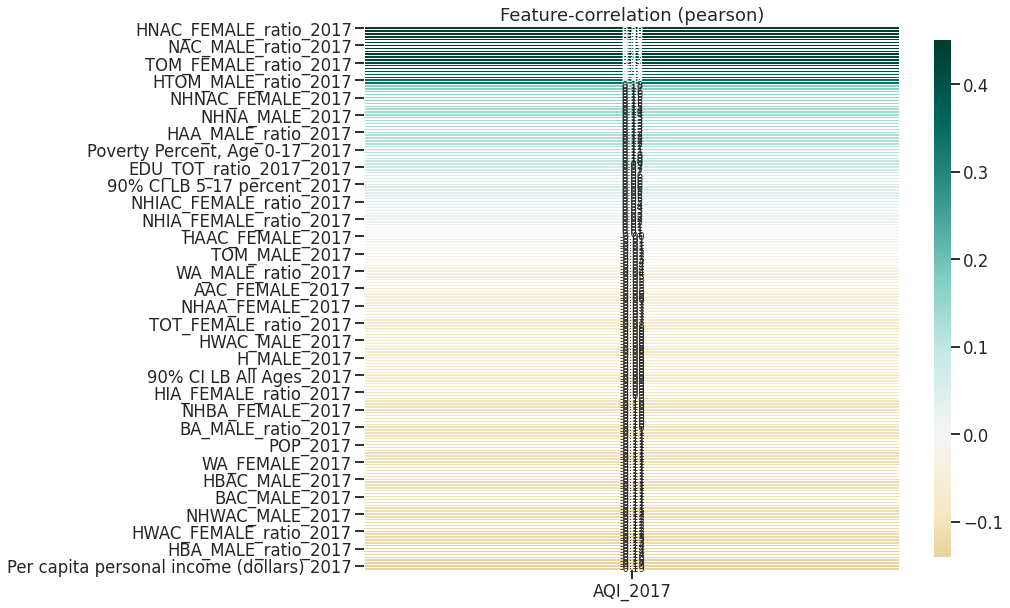

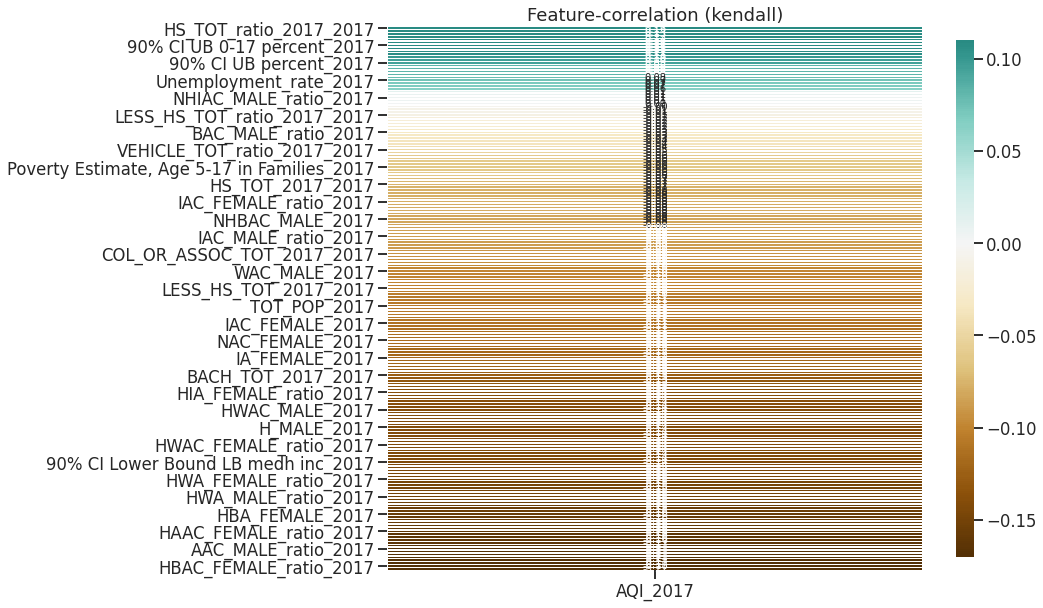

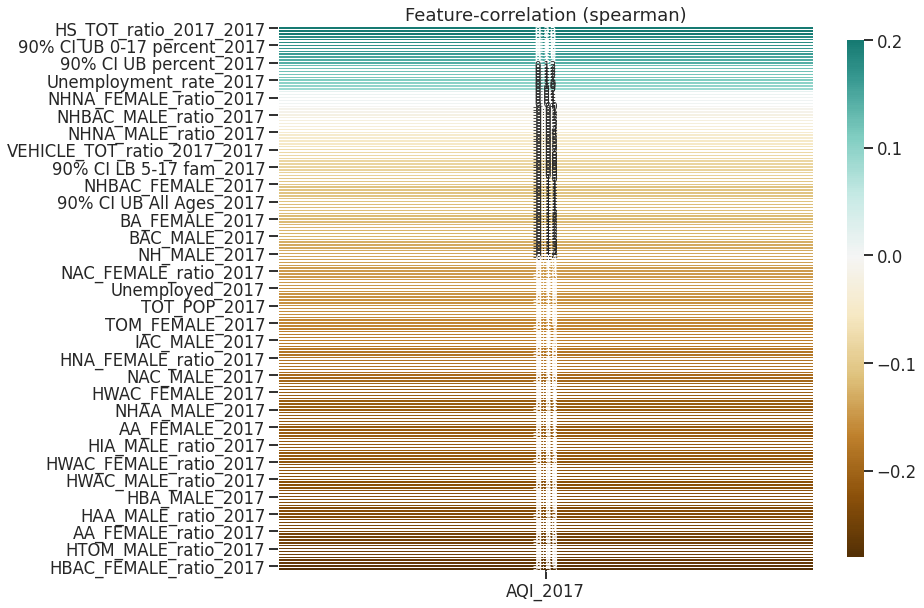

In [16]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [17]:
avg_so2_2018 = avg_so2_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[7:11])
unemploy_rate_2018 = unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[24:45])
pov_rate_2018 = pov_rate_2017_2019.loc[:, pov_col_2018]

incomes_2018 = county_incomes_2017_2019.iloc[:, [0, 3, 6]]

educ_vehicle_2018_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[19:34])
educ_vehicle_2018 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

county_dem_ratio_2018_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[148:293])
county_dem_ratio_2018 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2018_col]

In [18]:
avg_so2_unemploy_2018 = pd.merge(avg_so2_2018, unemploy_rate_2018, how='inner')
avg_so2_unemploy_pov_2018 = pd.merge(avg_so2_unemploy_2018, pov_rate_2018, how='inner')
avg_so2_unemploy_pov_inc_2018 = pd.merge(avg_so2_unemploy_pov_2018, incomes_2018, how='inner')
avg_so2_unemploy_pov_inc_educ_veh_2018 = pd.merge(avg_so2_unemploy_pov_inc_2018, educ_vehicle_2018, how='inner')
df_2018 = pd.merge(avg_so2_unemploy_pov_inc_educ_veh_2018, county_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,County Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,1073,Alabama,Jefferson,8.542767,315793,304248,11545,3.7,103604.0,95029.0,...,1.881780,1.642027,0.173180,0.182885,0.057474,0.049588,0.018804,0.014255,0.016833,0.013497
1,1097,Alabama,Mobile,1.608451,189004,180293,8711,4.6,84539.0,76590.0,...,1.323483,1.233607,0.193280,0.179025,0.071997,0.055326,0.027542,0.021261,0.017154,0.015221
2,1117,Alabama,Shelby,4.958564,114634,111425,3209,2.8,16916.0,14506.0,...,2.765060,2.624511,0.102513,0.114109,0.102049,0.082567,0.030615,0.035717,0.010205,0.020410
3,4013,Arizona,Maricopa,2.294991,2217163,2127021,90142,4.1,535183.0,516969.0,...,14.450358,14.396433,0.537275,0.547746,0.760494,0.740368,0.267445,0.272011,0.076663,0.074596
4,4019,Arizona,Pima,0.090411,484209,463057,21152,4.4,164927.0,155454.0,...,16.838100,17.547952,0.535235,0.563019,1.233800,1.217399,0.298007,0.303795,0.067435,0.075442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,55027,Wisconsin,Dodge,0.072254,47964,46703,1261,2.6,7283.0,5977.0,...,2.628852,2.048205,0.091082,0.070589,0.088805,0.069450,0.019355,0.023909,0.007970,0.013662
215,55079,Wisconsin,Milwaukee,0.334247,468452,451475,16977,3.6,177263.0,168055.0,...,7.050284,6.776885,0.644583,0.663274,0.316695,0.320602,0.073498,0.079728,0.020275,0.018797
216,55087,Wisconsin,Outagamie,11.553425,103341,100447,2894,2.8,13196.0,11058.0,...,2.076745,1.897484,0.093643,0.081871,0.196919,0.179795,0.044949,0.033712,0.011772,0.009097
217,56021,Wyoming,Laramie,0.226107,48190,46397,1793,3.7,8839.0,7212.0,...,7.079351,6.603955,0.275123,0.258939,0.419764,0.412684,0.138573,0.123401,0.044505,0.032367


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

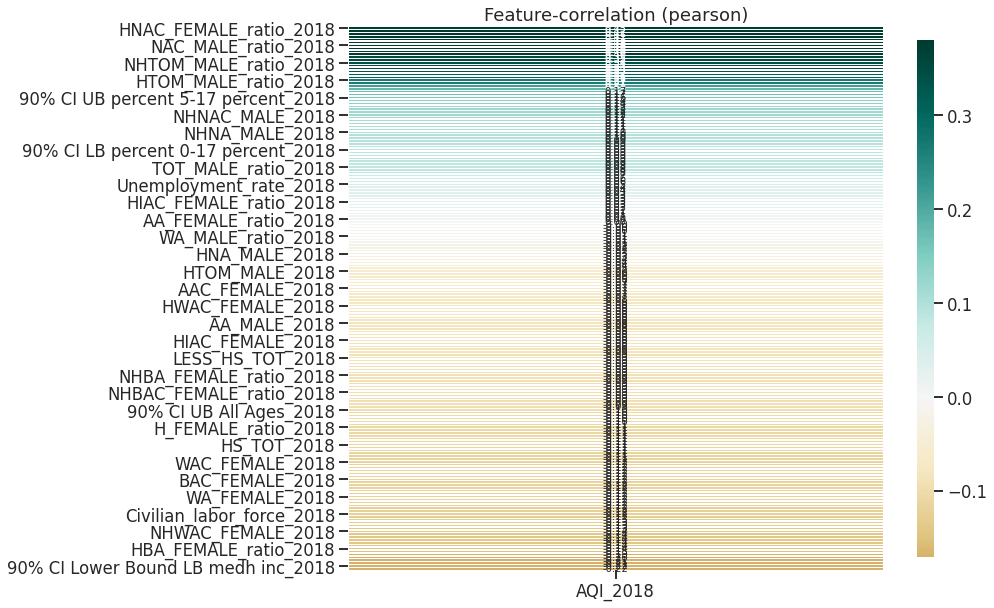

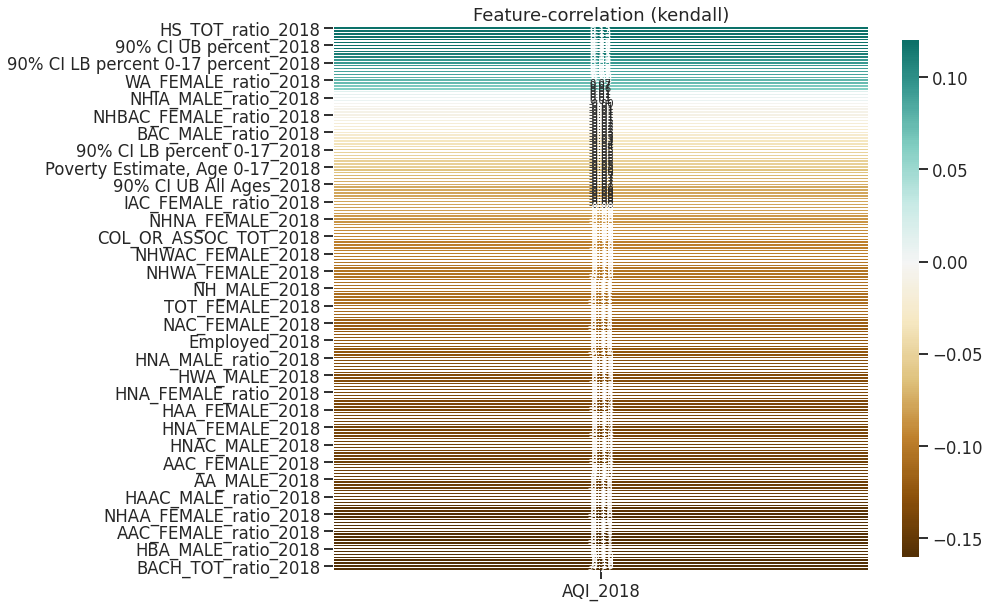

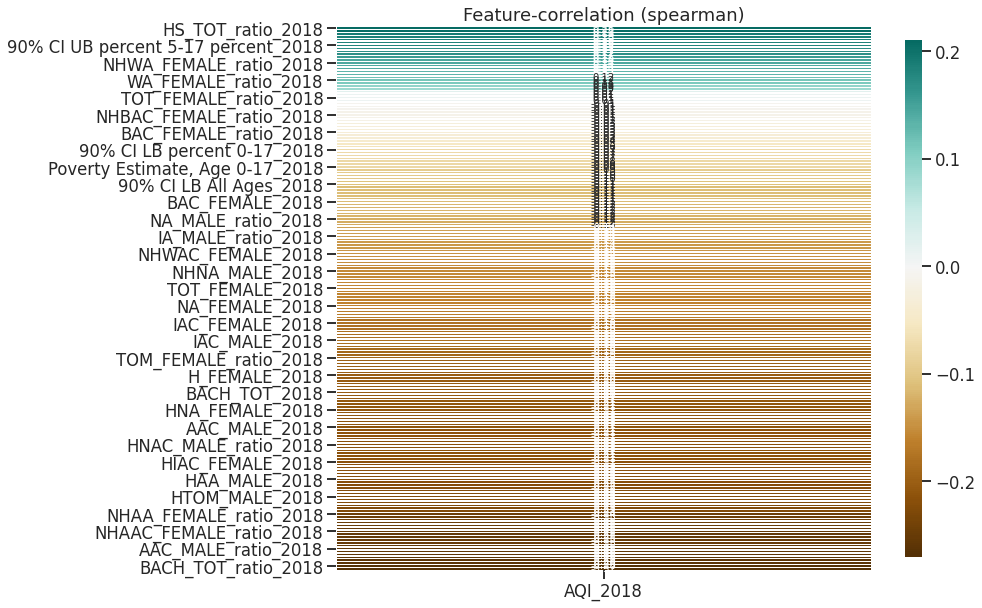

In [19]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [20]:
avg_so2_2019 = avg_so2_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[11:])
unemploy_rate_2019 = unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[45:])
pov_rate_2019 = pov_rate_2017_2019.loc[:, pov_col_2019]

incomes_2019 = county_incomes_2017_2019.iloc[:, [0, 4, 7]]

educ_vehicle_2019_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[34:])
educ_vehicle_2019 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

county_dem_ratio_2019_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[293:])
county_dem_ratio_2019 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2019_col]

In [21]:
avg_so2_unemploy_2019 = pd.merge(avg_so2_2019, unemploy_rate_2019, how='inner')
avg_so2_unemploy_pov_2019 = pd.merge(avg_so2_unemploy_2019, pov_rate_2019, how='inner')
avg_so2_unemploy_pov_inc_2019 = pd.merge(avg_so2_unemploy_pov_2019, incomes_2019, how='inner')
avg_so2_unemploy_pov_inc_educ_veh_2019 = pd.merge(avg_so2_unemploy_pov_inc_2019, educ_vehicle_2019, how='inner')
df_2019 = pd.merge(avg_so2_unemploy_pov_inc_educ_veh_2019, county_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,County Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,Jefferson,6.159844,318755,309664,9091,2.9,104288.0,95487.0,...,1.931601,1.694117,0.178872,0.190260,0.060586,0.053297,0.021106,0.013666,0.017766,0.013818
1,1097,Alabama,Mobile,3.200000,189107,182083,7024,3.7,71784.0,63651.0,...,1.326686,1.276833,0.189492,0.177150,0.068246,0.053484,0.025411,0.024927,0.017667,0.015246
2,1117,Alabama,Shelby,6.776860,115939,113414,2525,2.2,13428.0,10762.0,...,2.784081,2.643522,0.116214,0.119889,0.096921,0.087275,0.030776,0.034451,0.014699,0.020211
3,4013,Arizona,Maricopa,1.766910,2310503,2217656,92847,4.0,539670.0,518548.0,...,14.525995,14.484705,0.549158,0.555824,0.764946,0.747088,0.272394,0.278191,0.077228,0.075467
4,4019,Arizona,Pima,0.011019,498695,476620,22075,4.4,142859.0,130904.0,...,16.939230,17.625962,0.543886,0.567853,1.247041,1.226703,0.304503,0.311283,0.071423,0.079348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,55027,Wisconsin,Dodge,0.043836,47544,46107,1437,3.0,6512.0,5410.0,...,2.651442,2.127756,0.095630,0.077414,0.091076,0.069445,0.026184,0.025046,0.009108,0.011384
215,55079,Wisconsin,Milwaukee,0.397260,466908,448251,18657,4.0,156647.0,147199.0,...,7.161165,6.882860,0.653572,0.676306,0.319120,0.322821,0.073383,0.080362,0.020619,0.018822
216,55087,Wisconsin,Outagamie,4.436813,103135,100059,3076,3.0,13110.0,11133.0,...,2.125768,1.951194,0.096336,0.096336,0.212364,0.185752,0.045240,0.036725,0.011709,0.011177
217,56021,Wyoming,Laramie,1.022069,48491,46813,1678,3.5,9194.0,7774.0,...,7.128643,6.737688,0.269347,0.271357,0.423116,0.405025,0.135678,0.125628,0.053266,0.045226


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

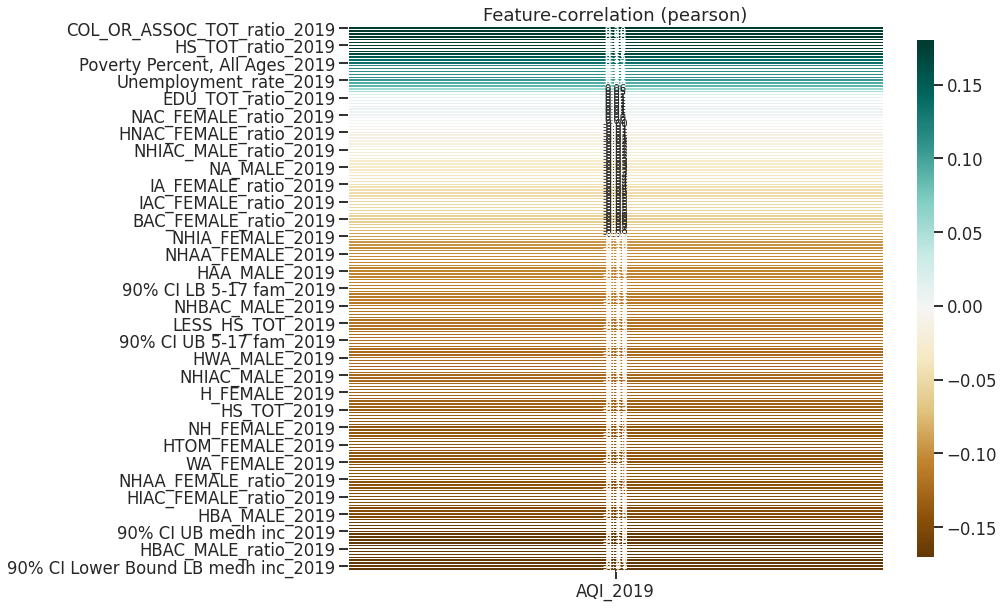

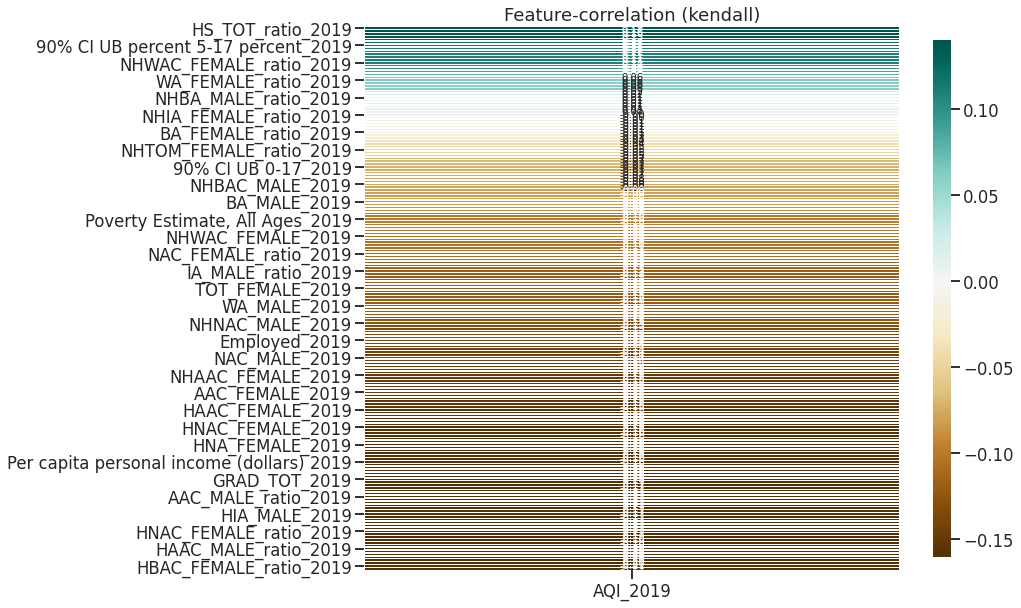

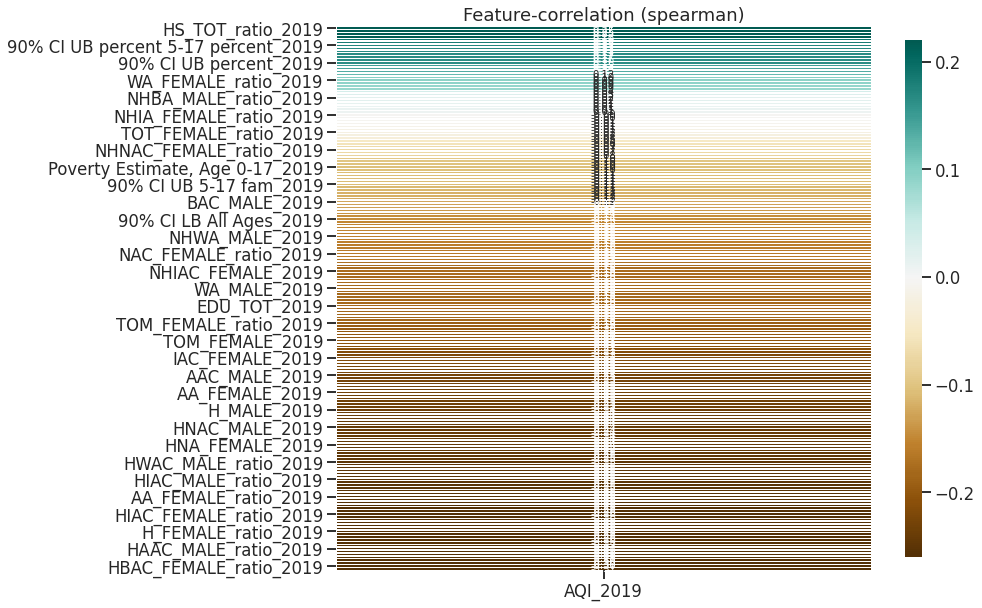

In [22]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [23]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017_2017,LESS_HS_TOT_2017_2017,HS_TOT_2017_2017,COL_OR_ASSOC_TOT_2017_2017,BACH_TOT_2017_2017,GRAD_TOT_2017_2017,VEHICLE_TOT_2017_2017,EDU_TOT_ratio_2017_2017,LESS_HS_TOT_ratio_2017_2017,HS_TOT_ratio_2017_2017,COL_OR_ASSOC_TOT_ratio_2017_2017,BACH_TOT_ratio_2017_2017,GRAD_TOT_ratio_2017_2017,VEHICLE_TOT_ratio_2017_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,J

# save data


In [24]:
# save 2017-2019 dataset
# data_path = r'../../data/processed/all_so2_df_2017_2019'
# df_2017_2019.to_csv(data_path, index=False)
#
# save datasets for individual years
data_path = r'../../data/processed/all_so2_df_2017'
df_2017.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_so2_df_2018'
df_2018.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_so2_df_2019'
df_2019.to_csv(data_path, index=False)

In [25]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

HNA_FEMALE_ratio_2017      0.415692
TOM_FEMALE_ratio_2017      0.418300
NHTOM_FEMALE_ratio_2017    0.423717
HNA_MALE_ratio_2017        0.426656
NHNAC_MALE_ratio_2017      0.466956
NA_MALE_ratio_2017         0.471654
NHNA_MALE_ratio_2017       0.471794
NAC_MALE_ratio_2017        0.472599
NA_FEMALE_ratio_2017       0.476827
NHNA_FEMALE_ratio_2017     0.478494
NHNAC_FEMALE_ratio_2017    0.478929
NAC_FEMALE_ratio_2017      0.482989
HNAC_MALE_ratio_2017       0.498303
HNAC_FEMALE_ratio_2017     0.500328
AQI_2017                   1.000000
Name: AQI_2017, dtype: float64

TOM_FEMALE_ratio_2018      0.344098
NHTOM_MALE_ratio_2018      0.344756
HNA_MALE_ratio_2018        0.349979
NHTOM_FEMALE_ratio_2018    0.351024
NHNAC_MALE_ratio_2018      0.399537
NA_MALE_ratio_2018         0.402224
NHNA_MALE_ratio_2018       0.403496
NAC_MALE_ratio_2018        0.403633
NA_FEMALE_ratio_2018       0.405827
NHNA_FEMALE_ratio_2018     0.408758
NHNAC_FEMALE_ratio_2018    0.410869
NAC_FEMALE_ratio_2018      0.413733
HNAC_MALE_ratio_2018       0.421352
HNAC_FEMALE_ratio_2018     0.425133
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

WA_FEMALE_ratio_2019                   0.114013
Poverty Percent, All Ages_2019         0.133524
Poverty Percent, Age 0-17_2019         0.137413
90% CI UB percent 5-17 percent_2019    0.152788
90% CI UB percent_2019                 0.165069
90% CI UB 0-17 percent_2019            0.172780
NH_FEMALE_ratio_2019                   0.182305
HS_TOT_ratio_2019                      0.183760
NHWA_FEMALE_ratio_2019                 0.196619
NHWAC_FEMALE_ratio_2019                0.196784
NHWA_MALE_ratio_2019                   0.199221
NHWAC_MALE_ratio_2019                  0.199640
NH_MALE_ratio_2019                     0.202031
COL_OR_ASSOC_TOT_ratio_2019            0.225279
AQI_2019                               1.000000
Name: AQI_2019, dtype: float64

In [26]:
display(df_2017.corr()['AQI_2017'].sort_values().head(15))
display(df_2018.corr()['AQI_2018'].sort_values().head(15))
display(df_2019.corr()['AQI_2019'].sort_values().head(15))

GRAD_TOT_ratio_2017_2017                    -0.194520
Per capita personal income (dollars) 2017   -0.185400
90% CI Lower Bound LB medh inc_2017         -0.166237
Median Household Income_2017                -0.160996
90% CI UB medh inc_2017                     -0.155004
HWA_MALE_ratio_2017                         -0.139109
HWA_FEMALE_ratio_2017                       -0.137585
HBA_MALE_ratio_2017                         -0.137528
HBA_FEMALE_ratio_2017                       -0.136189
HBAC_MALE_ratio_2017                        -0.127452
HBAC_FEMALE_ratio_2017                      -0.127307
GRAD_TOT_2017_2017                          -0.125240
HWAC_MALE_ratio_2017                        -0.124484
HWAC_FEMALE_ratio_2017                      -0.123349
H_MALE_ratio_2017                           -0.121412
Name: AQI_2017, dtype: float64

GRAD_TOT_ratio_2018                         -0.221922
90% CI Lower Bound LB medh inc_2018         -0.220421
Per capita personal income (dollars) 2018   -0.208086
Median Household Income_2018                -0.207285
BACH_TOT_ratio_2018                         -0.200262
90% CI UB medh inc_2018                     -0.193041
HBA_MALE_ratio_2018                         -0.146966
HBA_FEMALE_ratio_2018                       -0.143852
HBAC_MALE_ratio_2018                        -0.140402
GRAD_TOT_2018                               -0.139903
NHWA_FEMALE_2018                            -0.139455
NHWA_MALE_2018                              -0.138105
HBAC_FEMALE_ratio_2018                      -0.137930
NHWAC_FEMALE_2018                           -0.135788
NHWAC_MALE_2018                             -0.134408
Name: AQI_2018, dtype: float64

GRAD_TOT_ratio_2019                         -0.224417
90% CI Lower Bound LB medh inc_2019         -0.212022
Per capita personal income (dollars) 2019   -0.209745
Median Household Income_2019                -0.196252
H_FEMALE_ratio_2019                         -0.193796
H_MALE_ratio_2019                           -0.192737
BACH_TOT_ratio_2019                         -0.191270
HBAC_MALE_ratio_2019                        -0.188890
HBAC_FEMALE_ratio_2019                      -0.186076
HWAC_FEMALE_ratio_2019                      -0.184117
HWAC_MALE_ratio_2019                        -0.183647
HWA_FEMALE_ratio_2019                       -0.181386
HWA_MALE_ratio_2019                         -0.181042
90% CI UB medh inc_2019                     -0.179447
HBA_MALE_ratio_2019                         -0.176776
Name: AQI_2019, dtype: float64

In [27]:
display(df_2017.shape)
display(df_2018.shape)
display(df_2019.shape)

(219, 191)

(219, 191)

(219, 191)

# Result
One of the lesser recorded pollutants, SO2, We have less observations for this measure.
We drop from 1000 counties to 219 counties.

## postive covariance
Correlation looks as the years progress the covariance drops
* we go from 0.5 to 0.2 r values
* 2017-2018 it appears hnac females has highest r values of .4 - .5
*
## negative covariance
More consistent negative covariances
* appears with more graduate totals the less AQI
* income and white ethnicity have weak covariance
